In [1]:
import pandas as pd
import numpy as np
import vespa
from matplotlib import pyplot as plt
from astropy import units as u
from scipy.stats import gaussian_kde
from astropy.coordinates import SkyCoord

%matplotlib notebook

/Users/ageller/anaconda/envs/py36/lib/python3.6/site-packages/numpy/lib/npyio.py:2230: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)
/Users/ageller/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/ageller/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module

In [17]:
#this area is a bit odd because we're on a sphere... 
area = 0.1
maglim = 24
sigma_AV = 0.1 #default
binaries = False
filterset = 'lsst' #kepler_2mass
#galactic center
RAIn = 18*15.
DecIn = -29
filename = 'grid/test.trilegal.GC'

In [10]:
x = vespa.stars.trilegal.get_trilegal(filename, RAIn, DecIn, galactic=False, \
                              filterset=filterset, area=area, maglim=maglim, binaries=binaries, \
                              trilegal_version='1.6', sigma_AV=sigma_AV, convert_h5=True)
    

In [13]:
filename = 'grid/test.trilegal.GC.h5'
df = pd.read_hdf(filename)
df

,Gc,logAge,[M/H],m_ini,logL,logTe,logg,m-M0,Av,m2/m1,mbol,u_mag,g_mag,r_mag,i_mag,z_mag,Y_mag,Mact
0,1,6.65,-0.21,1.52835,0.799,3.893,4.344,14.9,2.384,0.0,17.674,22.339,20.482,19.744,19.393,19.116,18.940,1.528
1,1,6.65,-0.09,0.77392,-0.663,3.681,4.660,12.0,1.735,0.0,18.428,23.931,21.273,19.954,19.367,18.980,18.757,0.774
2,1,6.71,-0.13,1.42065,0.635,3.857,4.328,13.7,1.792,0.0,16.882,20.672,19.049,18.383,18.081,17.867,17.740,1.421
3,1,6.71,-0.05,1.29867,0.428,3.820,4.351,14.7,2.052,0.0,18.400,22.716,20.954,20.088,19.676,19.385,19.224,1.299
4,1,6.71,0.17,3.40356,2.092,4.107,4.251,14.5,2.480,0.0,14.041,18.895,17.560,17.114,16.923,16.721,16.599,3.404
5,1,6.77,-0.05,1.60070,0.843,3.889,4.300,13.1,2.049,0.0,15.764,19.918,18.170,17.522,17.229,17.004,16.856,1.601
6,1,6.77,-0.03,1.91011,1.154,3.951,4.316,11.8,1.444,0.0,13.685,16.848,15.353,15.078,14.999,14.914,14.821,1.910
7,1,6.81,-0.01,1.09390,0.030,3.769,4.468,13.5,1.920,0.0,18.196,22.716,20.758,19.747,19.279,18.961,18.786,1.094
8,1,6.81,0.01,0.98465,-0.198,3.742,4.545,13.4,1.839,0.0,18.665,23.395,21.245,20.156,19.663,19.331,19.147,0.985
9,1,6.87,0.03,1.10667,0.042,3.770,4.466,12.8,2.111,0.0,17.466,22.283,20.248,19.178,18.677,18.329,18.138,1.107


In [18]:
filename = 'grid/test.trilegal.GC.h5'

dist = np.array([])
logL = np.array([])
Av = np.array([])
RA = np.array([])
Dec = np.array([])
lGal = np.array([])
bGal = np.array([])
RAgrid = [RAIn]#[0]#np.arange(0,360, 1)
Decgrid = [DecIn]#[0]#np.arange(-90, 45, 1)
for r in RAgrid:
    for d in Decgrid:
        print(r,d)
        #filename = 'grid/trilegal.grid.ra'+str(r)+'.dec'+str(d)+'.h5'

        df = pd.read_hdf(filename)
        dist = np.append(dist, np.log10( 10.**(df['m-M0'].values/5.) *10. / 1000.)) #log(d [kpc])
        logL = np.append(logL, df['logL'].values)
        Av = np.append(Av, df['Av'].values)

        ras = np.random.uniform(low=r, high=(r+1.0), size=len(df['Av'].values))
        decs = np.random.uniform(low=d, high=(d+1.0), size=len(df['Av'].values))
        coords = SkyCoord(ras, decs, unit=(u.degree, u.degree),frame='icrs')
        RA = np.append(RA, ras)
        Dec = np.append(Dec, decs)
        lGal = np.append(lGal, coords.galactic.l.wrap_at(180.*u.degree).degree)
        bGal = np.append(bGal, coords.galactic.b.wrap_at(180.*u.degree).degree)


270.0 -29


447912


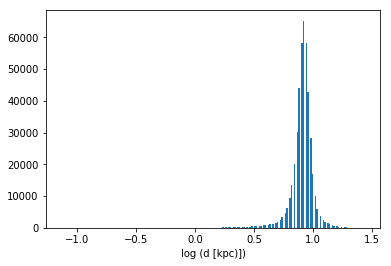

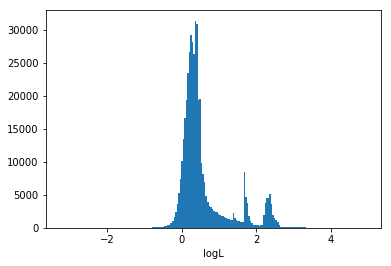

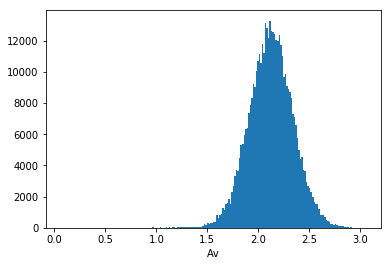

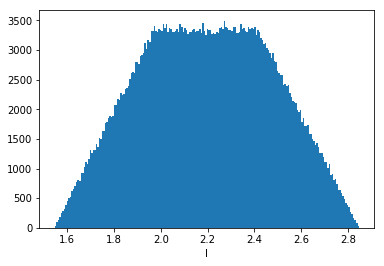

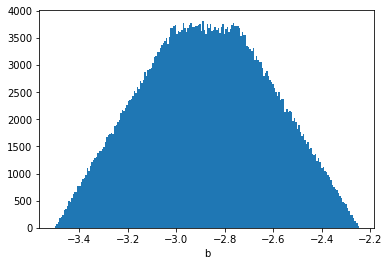

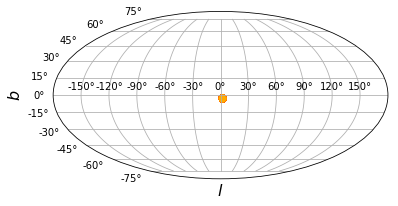

In [19]:
print(len(dist))
#nbins = int(np.floor(len(dist)**0.5))
nbins = 200

f,ax = plt.subplots()
n, bins, patches = ax.hist(dist, bins=nbins)
ax.set_xlabel('log (d [kpc)])')

f,ax = plt.subplots()
n, bins, patches = ax.hist(logL, bins=nbins)
ax.set_xlabel('logL')

f,ax = plt.subplots()
n, bins, patches = ax.hist(Av, bins=nbins)
ax.set_xlabel('Av')

f,ax = plt.subplots()
n, bins, patches = ax.hist(lGal, bins=nbins)
ax.set_xlabel('l')

f,ax = plt.subplots()
n, bins, patches = ax.hist(bGal, bins=nbins)
ax.set_xlabel('b')

f, ax = plt.subplots(subplot_kw={'projection': "mollweide"})
ax.grid(True)
ax.set_xlabel(r"$l$",fontsize=16)
ax.set_ylabel(r"$b$",fontsize=16)
ax.scatter(lGal*np.pi/180.,bGal*np.pi/180.,c=logL,cmap='autumn',alpha = 0.3)


[-4. -3. -2. -1.  0.  1.  2.]


<IPython.core.display.Javascript object>


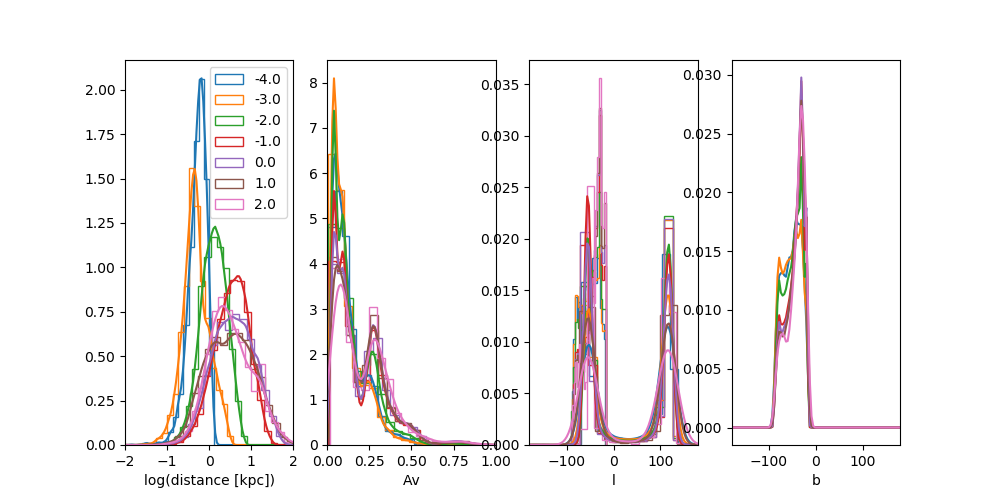

-4.0 3913
-3.0 23022
-2.0 220828
-1.0 232490
0.0 75010
1.0 6343
2.0 1133


<IPython.core.display.Javascript object>


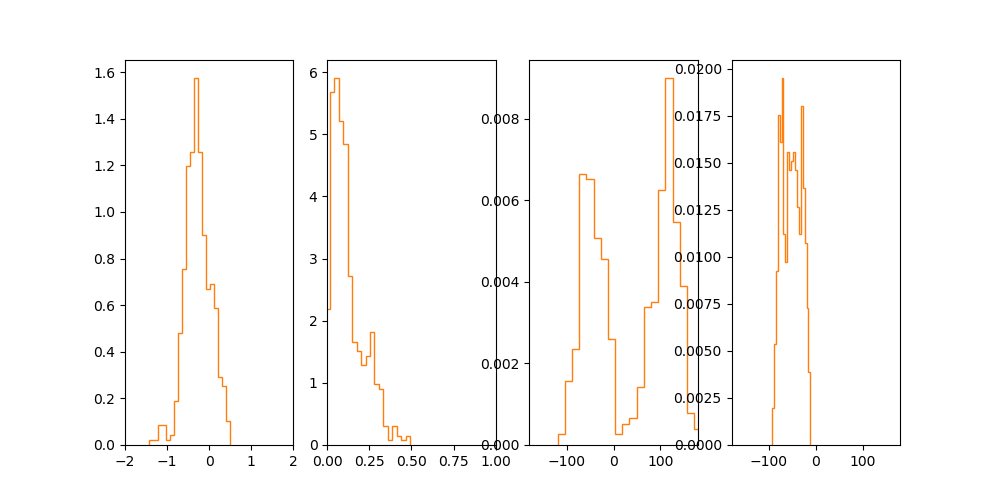

(-180, 180)

In [109]:
#take bins in logL
LbSize = 1.
Lbins = np.arange(-4,3,LbSize)
print(Lbins)

nbins = 20
kernels = {}

colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
f,ax = plt.subplots(1,4, figsize=[10,5])
for i,L in enumerate(Lbins):
    inL = np.where(np.logical_and(logL > L, logL < L + LbSize))
    print(L, len(inL[0]))
    
    data = np.vstack((dist[inL], Av[inL], lGal[inL], bGal[inL]))
    KDE = gaussian_kde(data)
    kernels[L] = KDE
    _,_,_ = ax[0].hist(dist[inL], bins=nbins, density=True, histtype='step', color=colors[i], label=str(L))
    KDEd = gaussian_kde(dist[inL])
    grid = np.linspace(-2,2,100)
    ax[0].plot(grid, KDEd(grid), color=colors[i])
    ax[0].set_xlabel('log(distance [kpc])')

    _,_,_ = ax[1].hist(Av[inL], bins=nbins, histtype='step', density=True, color=colors[i])
    KDEa = gaussian_kde(Av[inL])
    grid = np.linspace(0,1,100)
    ax[1].plot(grid, KDEa(grid), color=colors[i])
    ax[1].set_xlabel('Av')

    _,_,_ = ax[2].hist(lGal[inL], bins=nbins, histtype='step', density=True, color=colors[i])
    KDEl = gaussian_kde(lGal[inL])
    grid = np.linspace(-180,180,100)
    ax[2].plot(grid, KDEl(grid), color=colors[i])
    ax[2].set_xlabel('l')
    
    _,_,_ = ax[2].hist(bGal[inL], bins=nbins, histtype='step', density=True, color=colors[i])
    KDEb = gaussian_kde(bGal[inL])
    grid = np.linspace(-180,180,100)
    ax[3].plot(grid, KDEb(grid), color=colors[i])
    ax[3].set_xlabel('b')
ax[0].legend()
ax[0].set_xlim(-2,2)
ax[1].set_xlim(0,1)
ax[2].set_xlim(-180,180)
ax[3].set_xlim(-180,180)

i=1
n = 500
data = kernels[Lbins[i]].resample(size=n)
f,ax = plt.subplots(1,4, figsize=[10,5])
_,_,_ = ax[0].hist(data[0], bins=nbins, histtype='step', density=True, color=colors[i])
_,_,_ = ax[1].hist(data[1], bins=nbins, histtype='step', density=True, color=colors[i])
_,_,_ = ax[2].hist(data[2], bins=nbins, histtype='step', density=True, color=colors[i])
_,_,_ = ax[3].hist(data[3], bins=nbins, histtype='step', density=True, color=colors[i])
ax[0].set_xlim(-2,2)
ax[1].set_xlim(0,1)
ax[2].set_xlim(-180,180)
ax[3].set_xlim(-180,180)
